## Reload MEG Group

The MEG Group object risks getting quite large, and can end up with the same data loaded in multiple formats. 
To pre-empt that, here a new object is loaded with differently organized data for other analyses. 

In [1]:
# Import required libraries/functions
from __future__ import print_function, division
import sys

# Import custom code from module om, including general functions and OO code for handling data
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')

# Import meg classes and functions
from om.meg.group import GroupMegData
from om.meg.single import MegData

# Import plots for meg data
from om.plts.meg import *

# Import required OMDB code
from om.core.db import OMDB
from om.core.osc import Osc
from om.core.io import load_meg_pickle, save_meg_pickle

# Set plots to display inline
%matplotlib inline

In [2]:
# Initalize datbase object
db = OMDB()

In [3]:
# Initialize MegGroup object
osc = Osc(default=True)
meg_group = GroupMegData(db, osc)

In [4]:
# Check what data is available
sub_nums, source = db.check_dat_files('foof')


Number of Subjects available: 85

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341, 100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671]



In [5]:
# Add current subjects to meg_group
for i, subj in enumerate(sub_nums):
    meg_subj = MegData(OMDB(), source[i], osc)              # Initialize MegData object
    meg_subj.import_foof(subj, get_demo=False)         # Import subject data
    meg_group.add_subject(meg_subj,                    # Add subject data to group object
                          add_all_oscs=False,               # Don't include all-osc data
                          add_vertex_bands=False,           # Don't include osc-band-vertex data
                          add_vertex_oscs=True)             # Include oscillations per vertex

In [6]:
# OR: Check which files are available to load from pickle file
md_files = db.check_res_files('meg')


Number of files available: 5

Files available: 
Res_Group_67_all_osc_2016-10-02.p
Res_Group_67_vertex_osc_2016-10-02.p
Res_Group_85_all_oscs_2016-11-02.p
Res_Group_85_all_oscs_2016-11-11.p
Res_Group_85_vertex_osc_2016-11-02.p



In [7]:
# Load file from pickled object
#meg_group = load_meg_pickle(md_files[1])

In [8]:
# Do the rolling frequency correlation. 
f_win = 3
corr_vec, p_vec = meg_group.freq_corr(f_win)
fs = np.transpose(range(3, 40-f_win-1))

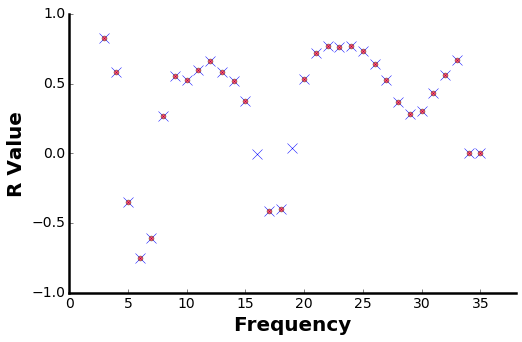

In [9]:
# Plot rolling frequency correlation
plot_freq_corr(fs, corr_vec, p_vec, save_out=False)

In [10]:
# Save out pickle file of current GroupMegData() object
#save_meg_pickle(meg_group, 'Group_85_vertex_osc')